In [1]:
import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
      keras.datasets.fashion_mnist.load_data()

In [2]:
# 정규화 0~255 -> 0~1 압축
train_scaled = train_input / 255.0
# 훈련세트, 검증세트
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target
)

In [3]:
# 층 구성
def model_fn(a_layer = None):
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(28,28)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [4]:
model = model_fn()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'])
hist = model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7569 - loss: 0.6927
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8535 - loss: 0.4125
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8703 - loss: 0.3578
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8790 - loss: 0.3331
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8859 - loss: 0.3184


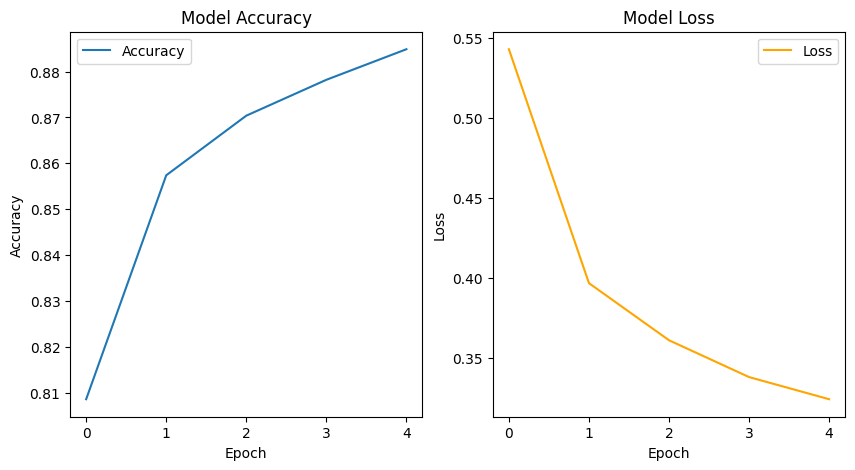

In [6]:
import matplotlib.pyplot as plt
_, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(hist.history['accuracy'], label='Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].legend()

axs[1].plot(hist.history['loss'], label='Loss', color='orange')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Model Loss')
axs[1].legend()

In [7]:
model = model_fn()
model.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model.fit(train_scaled,train_target,epochs=20, validation_data=(val_scaled,val_target))

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7567 - loss: 0.7101 - val_accuracy: 0.8428 - val_loss: 0.4382
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8541 - loss: 0.4103 - val_accuracy: 0.8542 - val_loss: 0.4053
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8699 - loss: 0.3610 - val_accuracy: 0.8572 - val_loss: 0.3862
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8782 - loss: 0.3358 - val_accuracy: 0.8737 - val_loss: 0.3496
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8833 - loss: 0.3249 - val_accuracy: 0.8701 - val_loss: 0.3625
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8891 - loss: 0.3089 - val_accuracy: 0.8616 - val_loss: 0.3958
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8945 - loss: 0.2942 - val_accuracy: 0.8530 - val_loss: 0.4251
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8959 - loss: 0.2873 - 

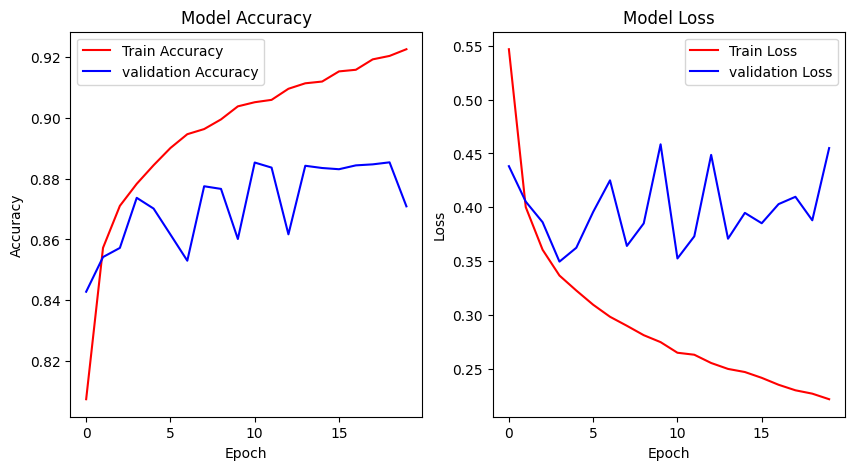

In [9]:
import matplotlib.pyplot as plt
_, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(history.history['accuracy'], label='Train Accuracy', color='red')
axs[0].plot(history.history['val_accuracy'], label='validation Accuracy', color='blue')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].legend()

axs[1].plot(history.history['loss'], label='Train Loss', color='red')
axs[1].plot(history.history['val_loss'], label='validation Loss',  color='blue')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Model Loss')
axs[1].legend()

In [14]:
model = model_fn()
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_scaled,train_target, epochs=50, validation_data=(val_scaled,val_target))

Epoch 1/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7701 - loss: 0.6667 - val_accuracy: 0.8499 - val_loss: 0.4091
Epoch 2/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8541 - loss: 0.4063 - val_accuracy: 0.8584 - val_loss: 0.3907
Epoch 3/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8712 - loss: 0.3627 - val_accuracy: 0.8701 - val_loss: 0.3546
Epoch 4/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8743 - loss: 0.3418 - val_accuracy: 0.8761 - val_loss: 0.3354
Epoch 5/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8903 - loss: 0.3056 - val_accuracy: 0.8807 - val_loss: 0.3312
Epoch 6/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8884 - loss: 0.2939 - val_accuracy: 0.8769 - val_loss: 0.3364
Epoch 7/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8941 - loss: 0.2874 - val_accuracy: 0.8826 - val_loss: 0.3218
Epoch 8/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8960 - loss: 0.2748 - 

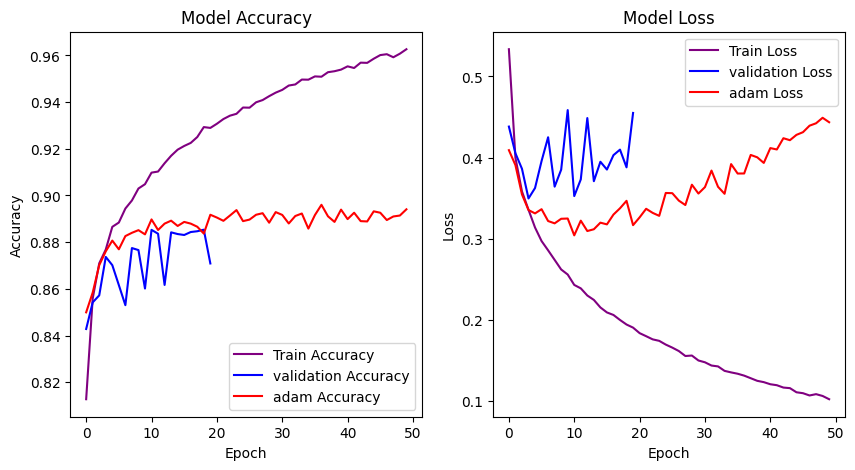

In [15]:
import matplotlib.pyplot as plt
_, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(hist.history['accuracy'], label='Train Accuracy', color='purple')
axs[0].plot(history.history['val_accuracy'], label='validation Accuracy', color='blue')
axs[0].plot(hist.history['val_accuracy'], label='adam Accuracy', color='red')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].legend()

axs[1].plot(hist.history['loss'], label='Train Loss', color='purple')
axs[1].plot(history.history['val_loss'], label='validation Loss',  color='blue')
axs[1].plot(hist.history['val_loss'], label='adam Loss',  color='red')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Model Loss')
axs[1].legend()

In [16]:
model = model_fn(keras.layers.Dropout(0.3))
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_scaled,train_target, epochs=50, validation_data=(val_scaled,val_target))

Epoch 1/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7235 - loss: 0.7854 - val_accuracy: 0.8460 - val_loss: 0.4228
Epoch 2/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8371 - loss: 0.4545 - val_accuracy: 0.8605 - val_loss: 0.3807
Epoch 3/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8503 - loss: 0.4152 - val_accuracy: 0.8657 - val_loss: 0.3620
Epoch 4/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8567 - loss: 0.3949 - val_accuracy: 0.8719 - val_loss: 0.3454
Epoch 5/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8669 - loss: 0.3622 - val_accuracy: 0.8664 - val_loss: 0.3558
Epoch 6/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8664 - loss: 0.3578 - val_accuracy: 0.8799 - val_loss: 0.3290
Epoch 7/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8701 - loss: 0.3552 - val_accuracy: 0.8725 - val_loss: 0.3454
Epoch 8/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8769 - loss: 0.3367 - 

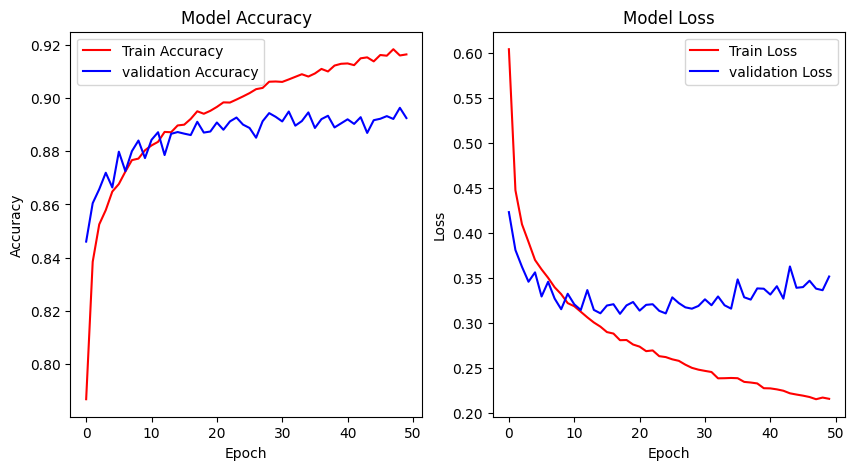

In [17]:
import matplotlib.pyplot as plt
_, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(hist.history['accuracy'], label='Train Accuracy', color='red')
axs[0].plot(hist.history['val_accuracy'], label='validation Accuracy', color='blue')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].legend()

axs[1].plot(hist.history['loss'], label='Train Loss', color='red')
axs[1].plot(hist.history['val_loss'], label='validation Loss',  color='blue')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Model Loss')
axs[1].legend()

In [18]:
model.save_weights('model.weights.h5') # 확장자 : .weights.h5

In [19]:
model.save('model-whole.keras') # 확장자 : .keras

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5')

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step


array([[6.64290671e-14, 3.86738647e-16, 1.91465997e-19, ...,
        3.64876866e-01, 5.10177160e-14, 6.34254515e-01],
       [2.80249078e-04, 4.86998840e-15, 2.88676721e-10, ...,
        1.97646044e-13, 9.99656439e-01, 1.64247349e-09],
       [4.70788109e-06, 8.89203859e-16, 4.95407439e-05, ...,
        2.23905113e-15, 2.32379548e-07, 2.97028773e-14],
       ...,
       [7.69920001e-27, 6.59450127e-34, 0.00000000e+00, ...,
        9.28206188e-13, 4.89996096e-35, 1.00000000e+00],
       [6.69815636e-04, 6.34902558e-13, 6.24687731e-01, ...,
        3.67757366e-19, 8.85370446e-06, 1.01838775e-22],
       [5.58703095e-02, 1.68219230e-10, 8.16917121e-01, ...,
        6.76768643e-21, 9.88619604e-07, 1.20665945e-12]], dtype=float32)

In [22]:
import numpy as np
test_scaled = test_input /255.0
predictions = model.predict(test_scaled[:10])
np.argmax(predictions,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [24]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.evaluate(test_scaled,test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.8862 - loss: 0.3860


[0.38905394077301025, 0.8834999799728394]

In [28]:
model = keras.models.load_model('model-whole.keras')

In [31]:
predictions = model.predict(test_scaled[:10])
np.argmax(predictions,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [32]:
model.evaluate(test_scaled,test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8862 - loss: 0.3860  


[0.38905394077301025, 0.8834999799728394]

In [38]:
model = model_fn(keras.layers.Dropout(0.3))
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cd = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
model.fit(train_scaled,train_target, epochs=1000, validation_data=(val_scaled,val_target), callbacks=[checkpoint_cd, early_stopping_cb])

Epoch 1/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7280 - loss: 0.7802 - val_accuracy: 0.8300 - val_loss: 0.4441
Epoch 2/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8381 - loss: 0.4540 - val_accuracy: 0.8609 - val_loss: 0.3831
Epoch 3/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8521 - loss: 0.4118 - val_accuracy: 0.8709 - val_loss: 0.3502
Epoch 4/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8583 - loss: 0.3914 - val_accuracy: 0.8619 - val_loss: 0.3739
Epoch 5/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8637 - loss: 0.3733 - val_accuracy: 0.8765 - val_loss: 0.3344
Epoch 6/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8711 - loss: 0.3563 - val_accuracy: 0.8802 - val_loss: 0.3249
Epoch 7/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8715 - loss: 0.3483 - val_accuracy: 0.8773 - val_loss: 0.3350
Epoch 8/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8751 -

In [39]:
model = keras.models.load_model('best-model.keras')
predictions = model.predict(test_scaled[:10])
np.argmax(predictions,axis=1)
model.evaluate(test_scaled,test_target)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.8786 - loss: 0.3393


[0.34487196803092957, 0.8776999711990356]